In [32]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Perceptron

In [33]:
# perception class
class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
    random_state : int
        Random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications (updates in each epoch)
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self, X, y):
        """ Fit training data
        
        Parameters
        ---------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectiors where n_samples is the number of
            samples and n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        ------
        self : object
        
        """
        
        rgen = np.random.RandomState(self.random_state) # initalize random number gen
        
        self.w_ = rgen.normal(loc=0.0, # initalize random weights close to 0
                              scale=0.01,
                              size = 1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter): # loop through for specified iterations
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input (self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)
        

# Training on Iris Data

In [34]:
# training on iris data set
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris = pd.read_csv(iris_url, header=None)

In [35]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# select setosa and versi color
y_iris = iris.iloc[:100,4].values
y_iris = np.where(y_iris=='Iris-setosa', -1, 1)

X_iris = iris.iloc[:100, [0,2]].values

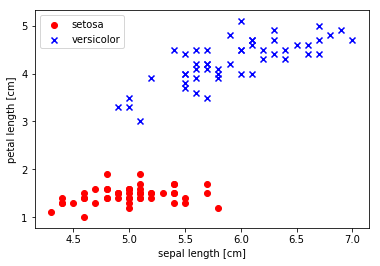

In [37]:
# plot the data
plt.scatter(X_iris[0:50,0], X_iris[0:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_iris[50:,0], X_iris[50:, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

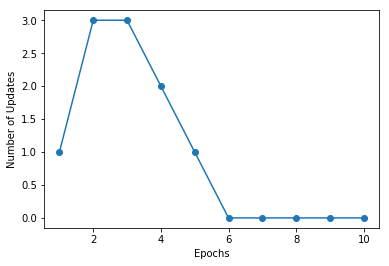

In [38]:
# training the perceptron on iris data
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_iris, y_iris)

plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_,
         marker= 'o')

plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.show()

In [39]:
# function for visualizing decision boundries in 2D
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

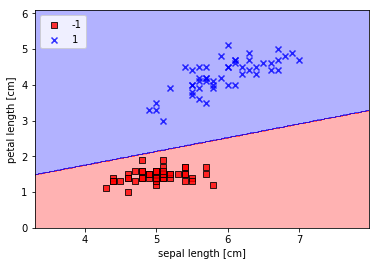

In [40]:
# plot the decision regions for the iris dataset
plot_decision_regions(X_iris, y_iris, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaptive Linear Neurons
Adaptive linear neurons are similar to perceptrons.

Unlike perceptrons, however, weights are updated based on a linear activation function rather than a unit step function.

Weights are also updated based on all samples in the training data, instead of incrementally like the perceptron.

In [41]:
# adaline class - gradient descent
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
    random_state : int
        Random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    cost : list
        Sum of squares cost function value in each epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self, X, y):
        """ Fit training data
        
        Parameters
        ---------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectiors where n_samples is the number of
            samples and n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        ------
        self : object
        
        """
        
        rgen = np.random.RandomState(self.random_state) # initalize random number gen
        
        self.w_ = rgen.normal(loc=0.0, # initalize random weights close to 0
                              scale=0.01,
                              size = 1 + X.shape[1])
        
        self.cost_ = []
        
        for _ in range(self.n_iter): # loop through for specified iterations
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] =+ self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input (self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

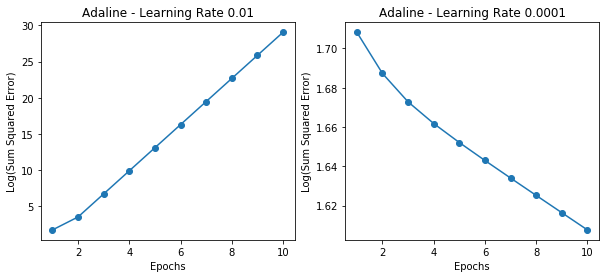

In [46]:
# plot different learning rates for the adaline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# learning rate = 0.01 (TOO LARGE)
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X_iris, y_iris)
ax[0].plot(range(1, len(ada1.cost_)+1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log(Sum Squared Error)')
ax[0].set_title('Adaline - Learning Rate 0.01')

# learning rate = 0.0001 (TOO SMALL)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X_iris, y_iris)
ax[1].plot(range(1, len(ada2.cost_)+1),
           np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Log(Sum Squared Error)')
ax[1].set_title('Adaline - Learning Rate 0.0001')

plt.show();

In [49]:
# use feature scaling (standardization)

# standardize features
X_iris_std = np.copy(X_iris)
X_iris_std[:, 0] = (X_iris[:,0] - X_iris[:,0].mean()) / X_iris[:,0].std()
X_iris_std[:, 1] = (X_iris[:,1] - X_iris[:,1].mean()) / X_iris[:,1].std()

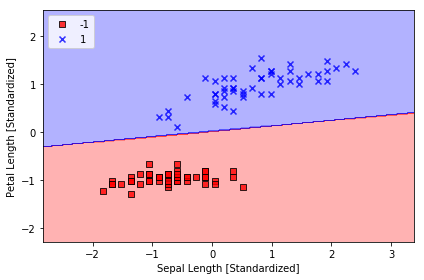

In [51]:
# train again after standardization, with learning rate = 0.01

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_iris_std, y_iris)

# plot classification
plot_decision_regions(X_iris_std, y_iris, classifier=ada)
plt.xlabel('Sepal Length [Standardized]')
plt.ylabel('Petal Length [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();

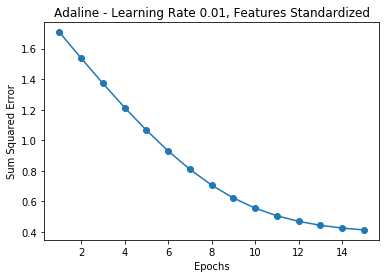

In [54]:
# plot cost function after standardization
plt.plot(range(1, len(ada.cost_)+1),
           np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Squared Error')
plt.title('Adaline - Learning Rate 0.01, Features Standardized')
plt.show()

In [68]:
# adaline class - stochastic gradient descent
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles
    random_state : int
        Random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    cost : list
        Sum of squares cost function value averaged over all
        training samples in each epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.w_initialized = False
        self.shuffle=shuffle
        self.random_state=random_state
    
    def fit(self, X, y):
        """ Fit training data
        
        Parameters
        ---------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectiors where n_samples is the number of
            samples and n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values
            
        Returns
        ------
        self : object
        
        """
        
        self._initialize_weights(X.shape[1])
        
        self.cost_ = []
        
        for _ in range(self.n_iter): # loop through for specified iterations
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost=[]
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without re-initalizing the weights"""
        if not self.w_initialized:
            self._initalize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip (X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights with small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                   size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input (self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

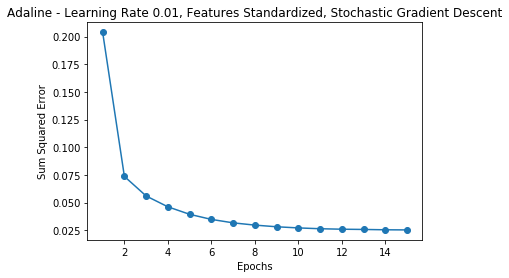

In [69]:
# learning rate with stochastic gradient descent
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_iris_std, y_iris)

plt.plot(range(1, len(ada_sgd.cost_)+1),
         ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Squared Error')
plt.title('Adaline - Learning Rate 0.01, Features Standardized, Stochastic Gradient Descent')
plt.show()

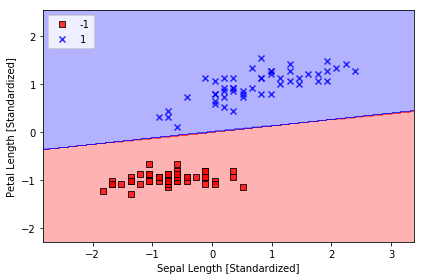

In [70]:
# classification visualization with gradient descent

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_iris_std, y_iris)

# plot classification
plot_decision_regions(X_iris_std, y_iris, classifier=ada_sgd)
plt.xlabel('Sepal Length [Standardized]')
plt.ylabel('Petal Length [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();

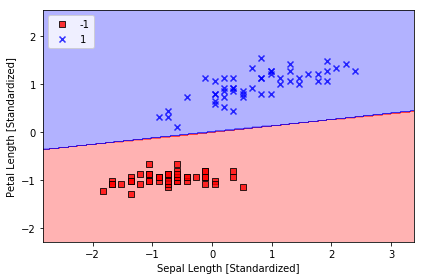

In [73]:
# test of partial fit update
ada_sgd.partial_fit(X_iris_std[0,:], y_iris[0])

# replot classification
plot_decision_regions(X_iris_std, y_iris, classifier=ada_sgd)
plt.xlabel('Sepal Length [Standardized]')
plt.ylabel('Petal Length [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();